<a href="https://colab.research.google.com/github/Nawapat2541/Simulated_annealing/blob/main/Simulated_annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import inspect as ins
import numpy as np
import math as m
import matplotlib.pyplot as plt
import random as rand

In [3]:
def delta_c(func, a, b):
  return abs(func(a) - func(b))

In [4]:
objective_function = lambda x:  (x+3)*(x-2)**2*(x+1)**3

In [5]:
diff = delta_c(objective_function, 3, 5)
print(diff)

15168


old-present ratio is less than tolerace
round#0, function_value = -1.064796699368205
round#1, function_value = -2.0434873169079713
round#2, function_value = -2.4879423603008677
round#3, function_value = -2.5504891439056636
round#4, function_value = -2.6454789286356855
round#5, function_value = -2.6131103745754674
round#6, function_value = -2.6127718020193194
round#7, function_value = -2.601430349539531
round#8, function_value = -2.597128876630978
round#9, function_value = -2.5962739944925577
round#10, function_value = -2.595937520271791
round#11, function_value = -2.5955234899634503
round#12, function_value = -2.5951738863543627
round#13, function_value = -2.595160505958091
round#14, function_value = -2.5950992849819987
round#15, function_value = -2.5950525928721873
round#16, function_value = -2.5950331237851962
round#17, function_value = -2.5950300833177713
round#18, function_value = -2.595025010693426
round#19, function_value = -2.595023987406333
round#20, function_value = -2.5950225

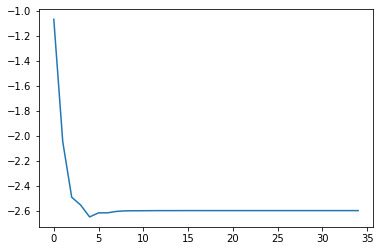

In [71]:
xlist, ylist = simulated_annealing(objective_function, -0.5, 4, 1250, tol=5e-11)
for index, value in enumerate(xlist):
    print(f"round#{index}, function_value = {value}")

for index, value in enumerate(ylist):
    print(f"round#{index}, function_value = {value}")
plt.plot(xlist)

In [33]:
def simulated_annealing(input_function, x0, rand_range=10, kmax=1000, tol=1e-10):
  xlist = []
  ylist = []
  k=1
  xpresent = x0
  while(k<=kmax):
    xold = xpresent
      
    if k>=kmax/10 and k<kmax/2:
      rand_range =  rand_range - rand_range*0.2
    elif k<3*kmax/4:
      rand_range =  rand_range - rand_range*0.5
    elif k<9*kmax/10:
      rand_range =  rand_range - rand_range*0.8
    else:
      rand_range =  rand_range - rand_range*0.95
    
    if input_function(xpresent+0.01) < input_function(xpresent):
      rand_x = rand.uniform(xpresent, xpresent+rand_range)
    else:
      rand_x = rand.uniform(xpresent-rand_range, xpresent)

    if input_function(rand_x) <  input_function(xpresent):
      xpresent = rand_x
    elif prob_func(input_function, xold, xpresent) >= rand.random():
      xpresent = rand_x    

    xlist.append(xpresent)
    ylist.append(input_function(xpresent))
    k = k + 1

    # print(f"xold = {xold}, xpresent = {xpresent}")
    if(abs(xold-xpresent)/abs(xpresent) <= tol):
      print("old-present ratio is less than tolerace")
      break

    if(abs(input_function(xpresent)) <= tol):
      print("present func is less than tolerace")
      break
    
  return xlist, ylist

In [7]:
def prob_func(func, old, present):
  if delta_c(func, old, present) <= 0:
    return 1
  else:
    return m.e**(-delta_c(func, old, present)/present)

In [56]:
x1 = list(np.linspace(-3.5, 2.5, 50))
print(x1)
result = []
for i in x1:
  result.append(objective_function(i))

print(result)

[-3.5, -3.377551020408163, -3.2551020408163267, -3.13265306122449, -3.010204081632653, -2.887755102040816, -2.7653061224489797, -2.642857142857143, -2.520408163265306, -2.3979591836734695, -2.2755102040816326, -2.1530612244897958, -2.0306122448979593, -1.9081632653061225, -1.7857142857142858, -1.663265306122449, -1.5408163265306123, -1.4183673469387754, -1.295918367346939, -1.1734693877551021, -1.0510204081632653, -0.9285714285714288, -0.806122448979592, -0.6836734693877551, -0.5612244897959187, -0.4387755102040818, -0.3163265306122449, -0.19387755102040805, -0.07142857142857162, 0.05102040816326525, 0.17346938775510212, 0.29591836734693855, 0.4183673469387754, 0.5408163265306118, 0.6632653061224492, 0.7857142857142856, 0.908163265306122, 1.0306122448979593, 1.1530612244897958, 1.2755102040816322, 1.3979591836734695, 1.520408163265306, 1.6428571428571423, 1.7653061224489797, 1.887755102040816, 2.0102040816326525, 2.13265306122449, 2.2551020408163263, 2.3775510204081627, 2.5]
[236.32812

[-1.064796699368205, -2.0434873169079713, -2.4879423603008677, -2.5504891439056636, -2.6454789286356855, -2.6131103745754674, -2.6127718020193194, -2.601430349539531, -2.597128876630978, -2.5962739944925577, -2.595937520271791, -2.5955234899634503, -2.5951738863543627, -2.595160505958091, -2.5950992849819987, -2.5950525928721873, -2.5950331237851962, -2.5950300833177713, -2.595025010693426, -2.595023987406333, -2.595022542927305, -2.595021878746028, -2.5950214654418082, -2.5950213170657084, -2.595021258913622, -2.5950212468274763, -2.5950212232664587, -2.595021218490779, -2.5950212166604385, -2.59502121413532, -2.5950212134870574, -2.5950212126916528, -2.5950212123965057, -2.595021212219257, -2.5950212122089966]
[-0.0049452538675640815, -17.769058935832568, -33.9759582874817, -34.69465228973344, -34.08631223447582, -34.559466428712234, -34.56286063633087, -34.65884576378115, -34.68641240707849, -34.691322823717414, -34.69320417065472, -34.695479429124745, -34.69736654418678, -34.697438

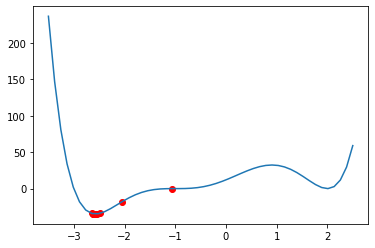

In [72]:
plt.scatter(xlist, ylist, c='r')
print(xlist)
print(ylist)
plt.plot(x1, result)